In [16]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):  
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.utils import util
from mejiro.lenses import lens_util

In [18]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir

In [29]:
tuple_list = []
for i in range(0, 200):
    try:
        lens, f129, rgb_image = lens_util.get_sample(pipeline_dir, i, band='f129', model=False)
        f129 *= 146
        tuple_list.append((lens, f129, rgb_image))
    except Exception as e:
        print(e)
        pass

print(f'Collected {len(tuple_list)} samples')

Collected 200 samples


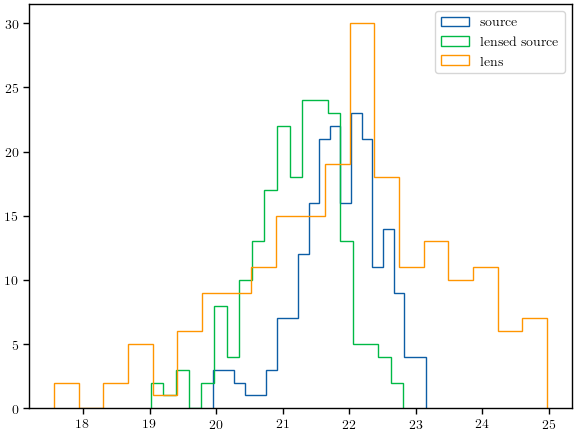

In [30]:
source_mags = [l.source_mags['F129'] for l, _, _ in tuple_list]
lensed_source_mags = [l.lensed_source_mags['F129'] for l, _, _ in tuple_list]
lens_mags = [l.lens_mags['F129'] for l, _, _ in tuple_list]

plt.hist(source_mags, bins=20, label='source', histtype='step')
plt.hist(lensed_source_mags, bins=20, label='lensed source', histtype='step')
plt.hist(lens_mags, bins=20, label='lens', histtype='step')
plt.legend()
plt.show()

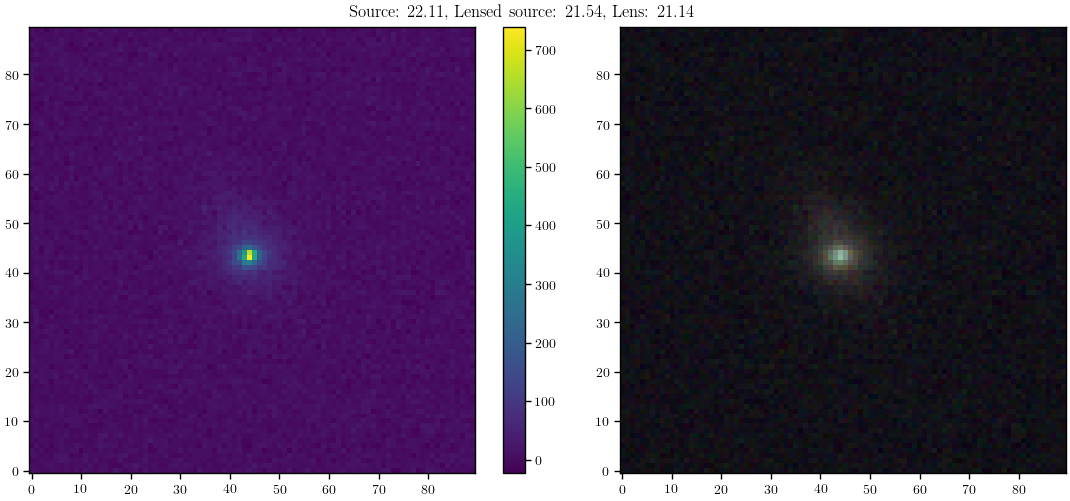

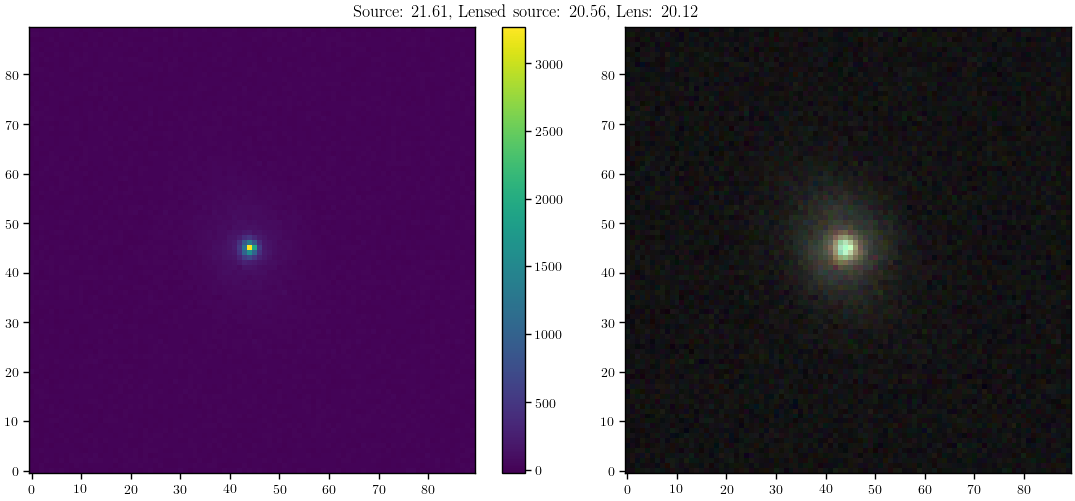

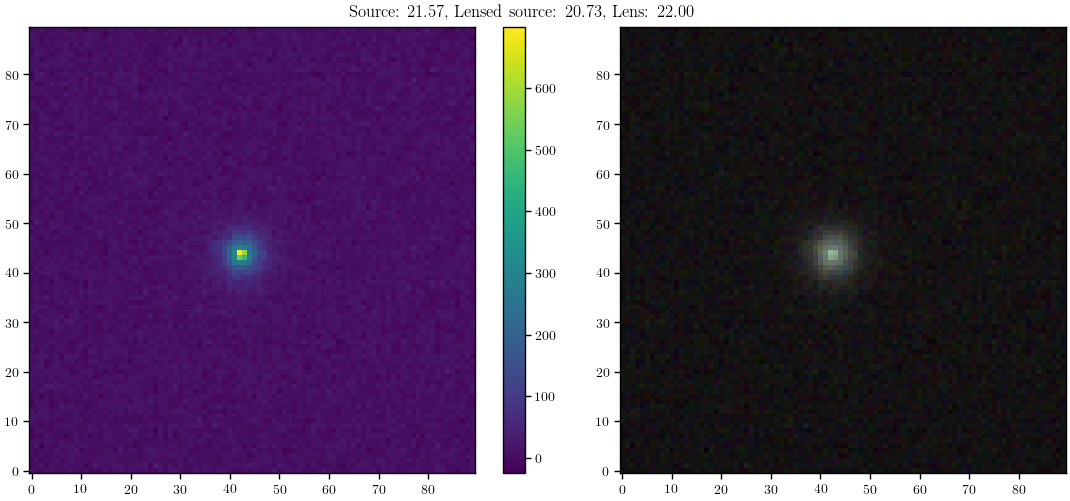

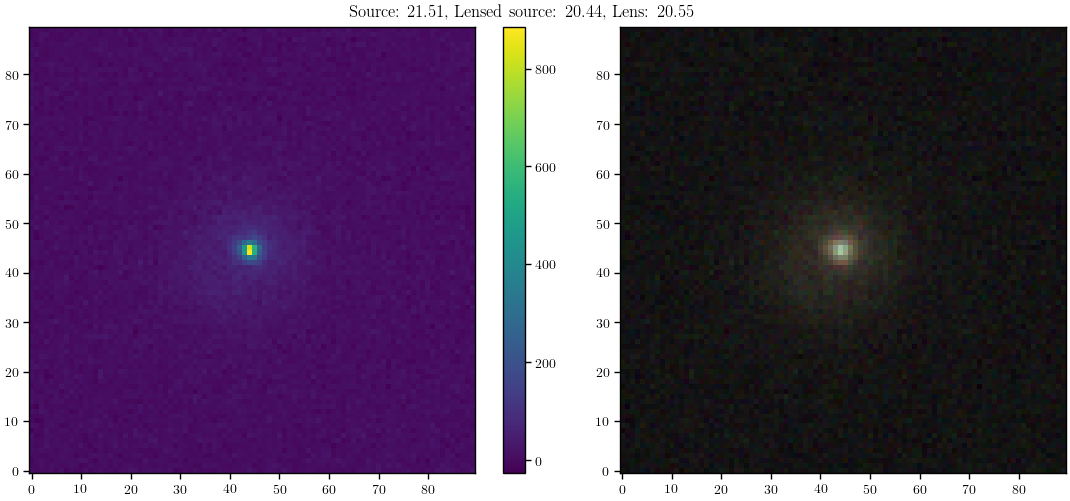

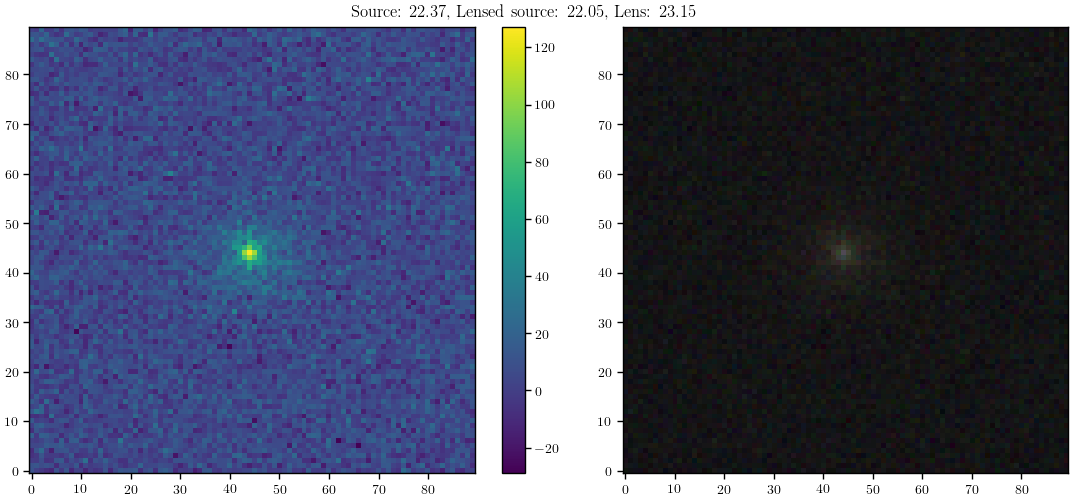

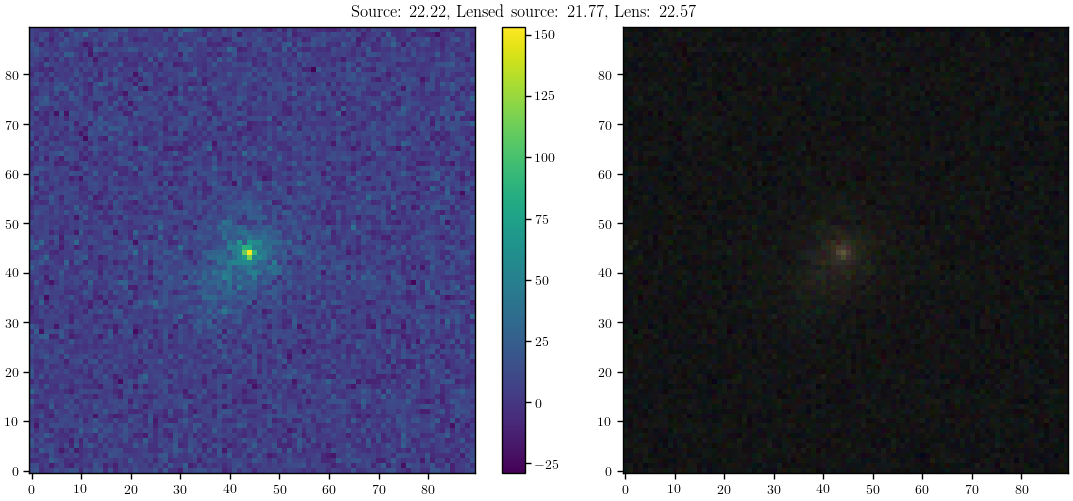

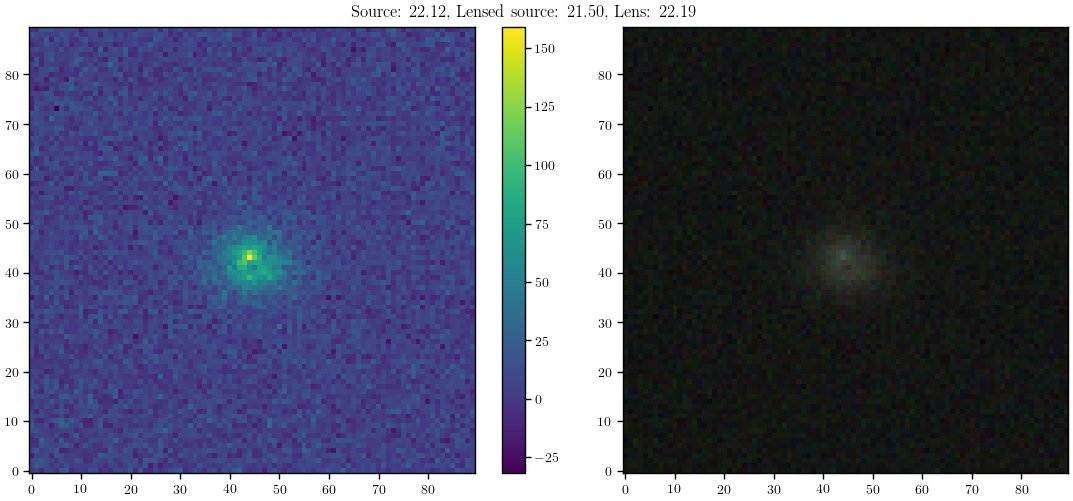

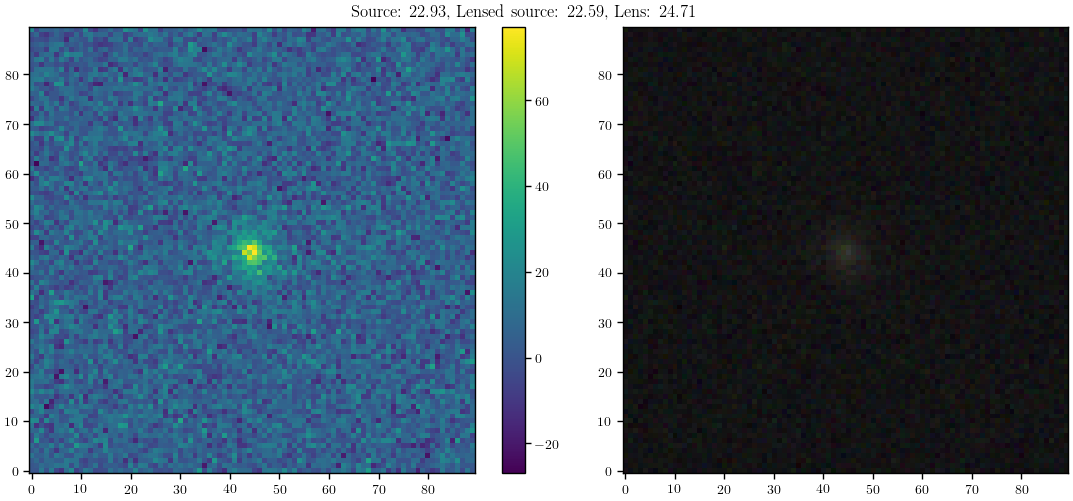

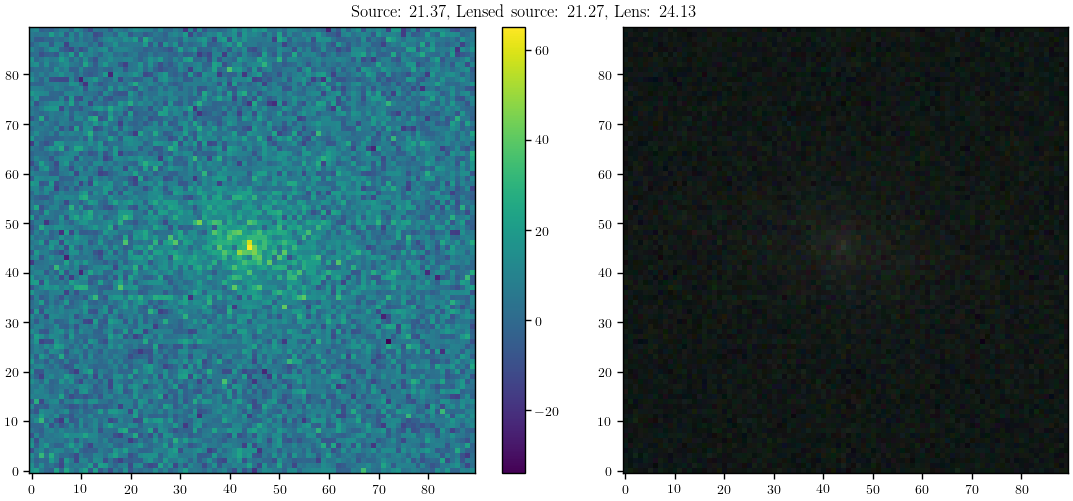

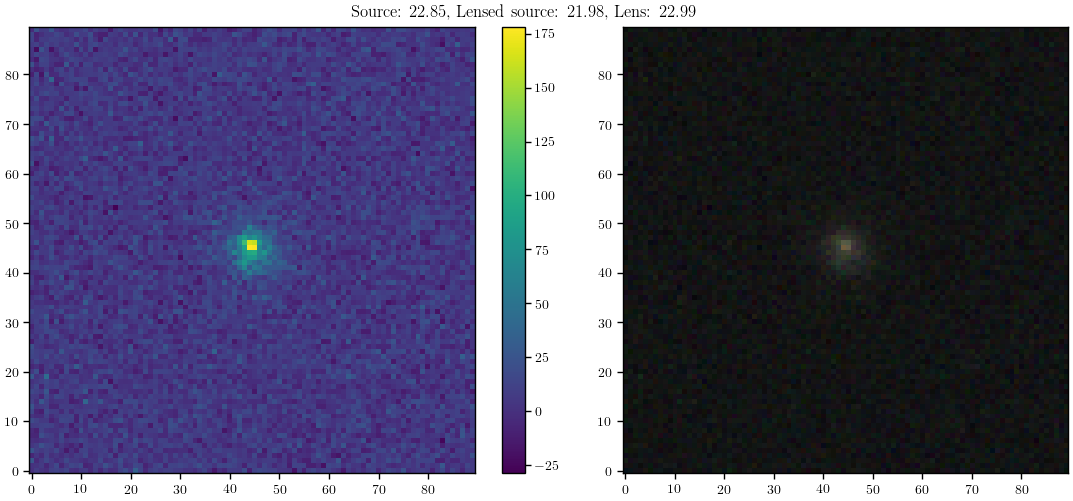

In [32]:
indices = np.random.randint(0, len(tuple_list), 10)
selection = [tuple_list[i] for i in indices]

for lens, f129, rgb_image in selection:
    _, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
    ax0 = ax[0].imshow(f129)
    plt.colorbar(ax0, ax=ax[0])
    ax[1].imshow(rgb_image)
    source_mag = lens.source_mags['F129']
    lensed_source_mag = lens.lensed_source_mags['F129']
    lens_mag = lens.lens_mags['F129']
    plt.suptitle(f'Source: {source_mag:.2f}, Lensed source: {lensed_source_mag:.2f}, Lens: {lens_mag:.2f}')
    plt.show()

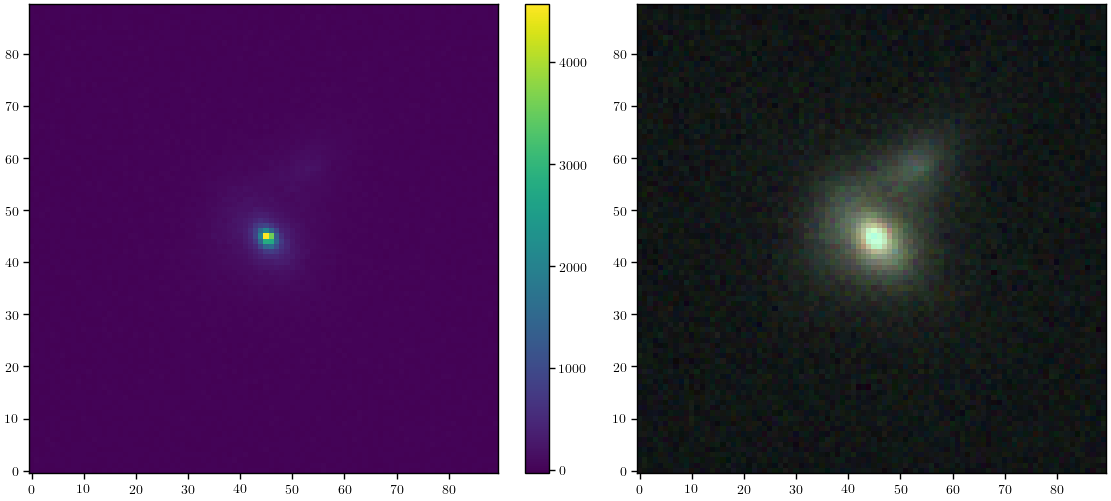

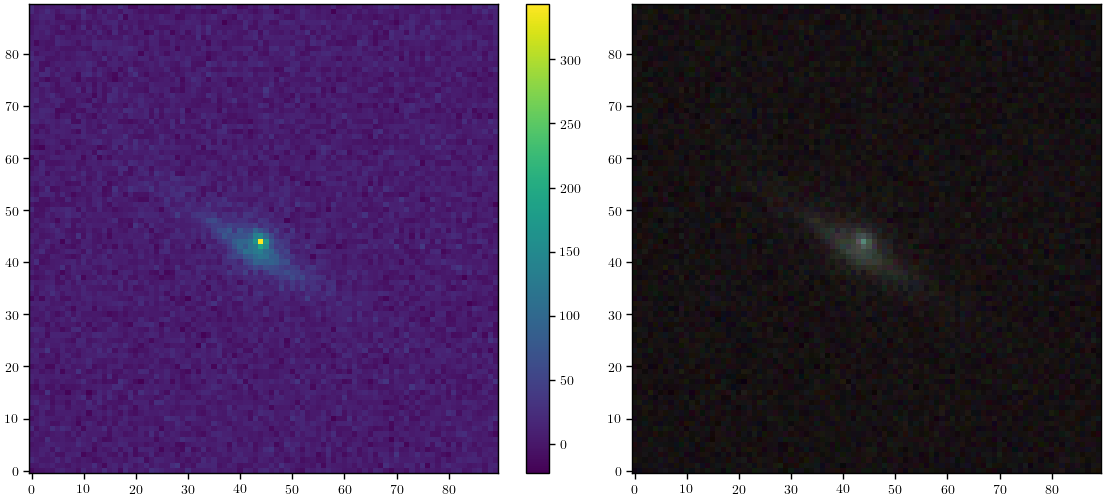

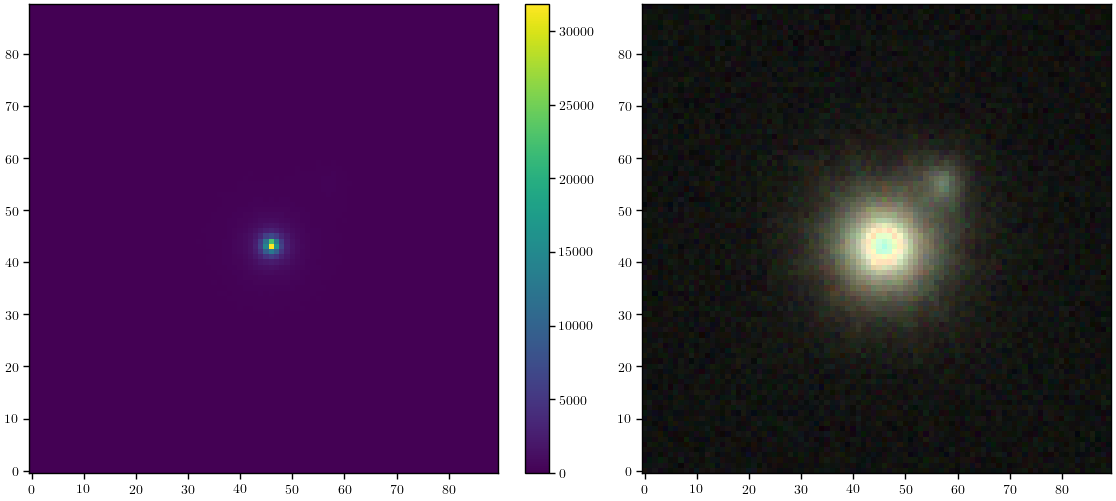

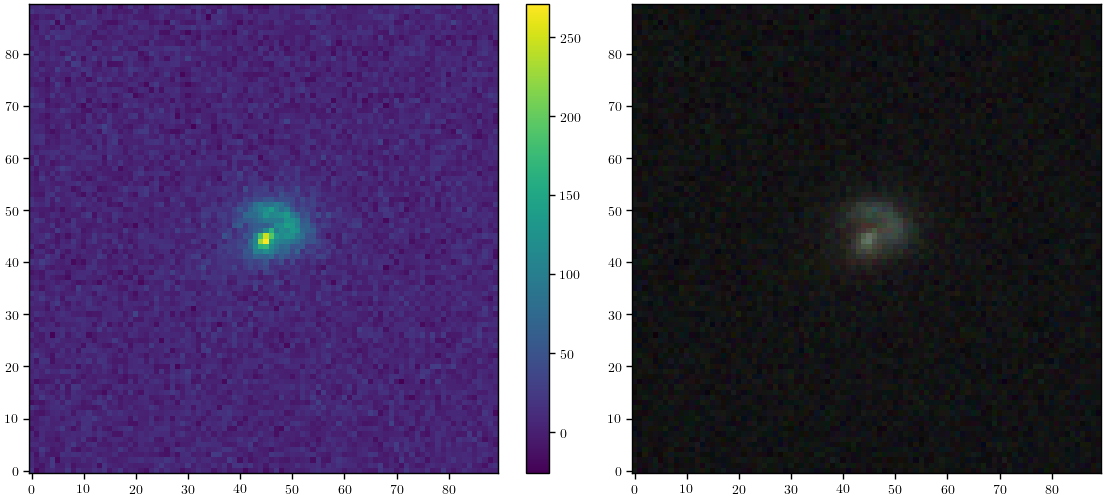

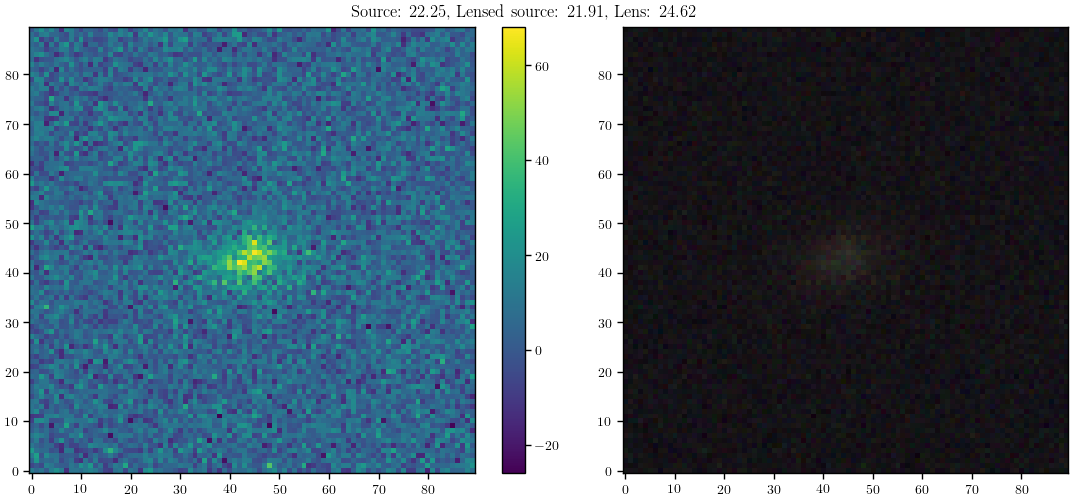

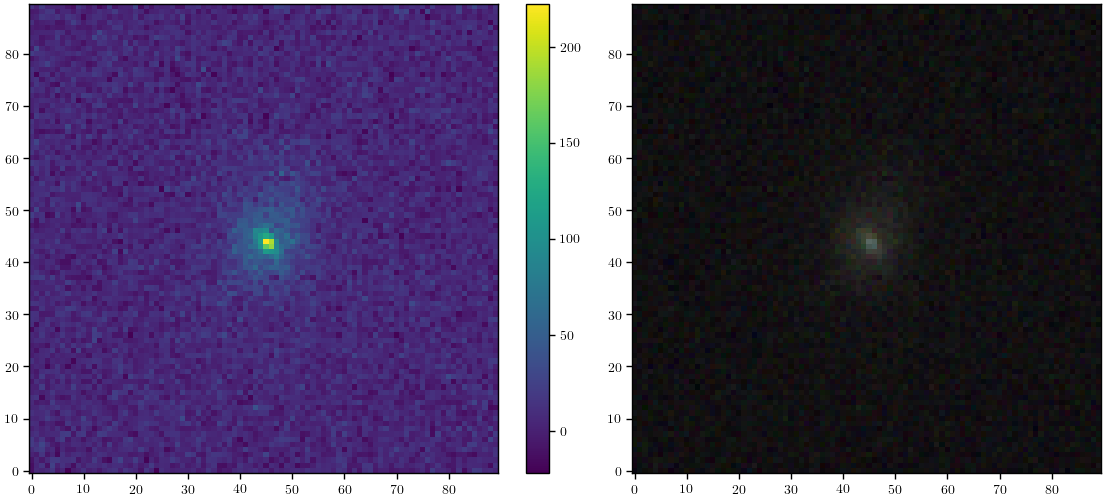

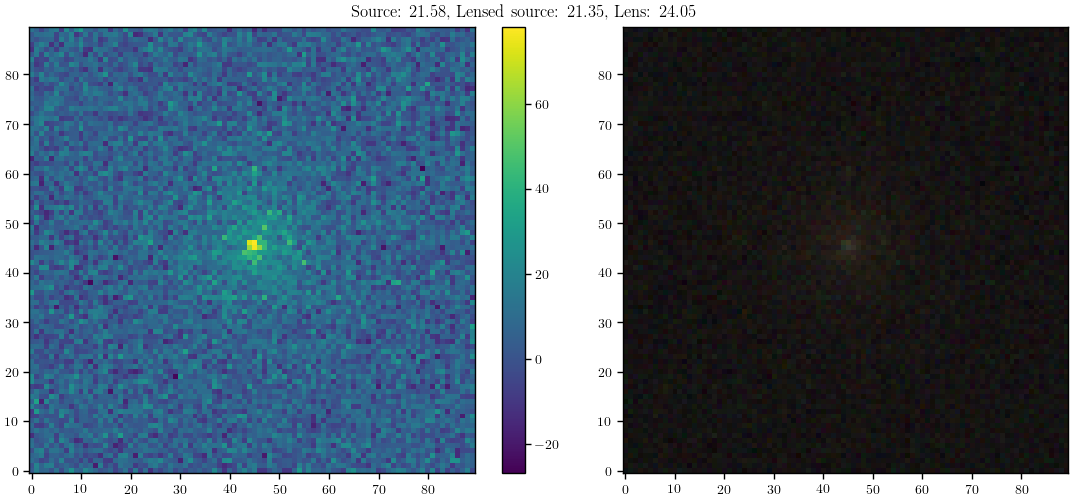

In [33]:
limit = 10
i = 0
for lens, f129, rgb_image in tuple_list:
    _, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
    ax0 = ax[0].imshow(f129)
    plt.colorbar(ax0, ax=ax[0])
    ax[1].imshow(rgb_image)
    source_mag = lens.source_mags['F129']
    lensed_source_mag = lens.lensed_source_mags['F129']
    lens_mag = lens.lens_mags['F129']
    if lens_mag > 24:
        plt.suptitle(f'Source: {source_mag:.2f}, Lensed source: {lensed_source_mag:.2f}, Lens: {lens_mag:.2f}')
        plt.show()
        i += 1
        if i > limit:
            break
    else:
        continue